# Classification

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import svm

from sklearn.model_selection import train_test_split

In [2]:
X,y = load_iris(return_X_y=True)
X = X[:,0:2]
feature_names = load_iris().feature_names


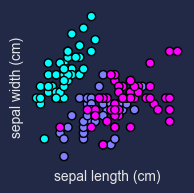

In [3]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

plt.figure(figsize=(2,2))
plt.scatter(X[:,0],X[:,1],c=y,edgecolors="k")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.tick_params(which="both",bottom=False,top=False,labelbottom=False,labelleft=False)
plt.grid(False)


# Maximum Margin Separating Hyperplane

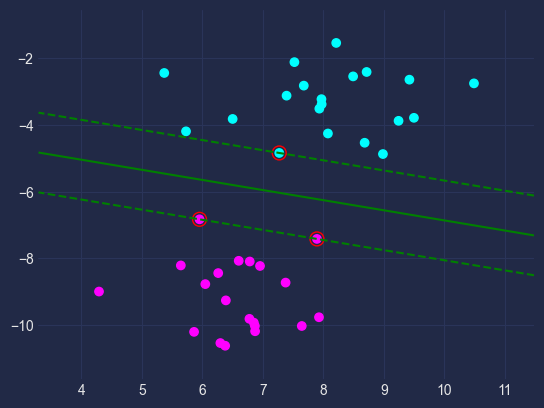

In [4]:
from sklearn.datasets import make_blobs,make_classification
from sklearn.inspection import DecisionBoundaryDisplay
X,y = make_blobs(n_samples=40,centers=2,random_state=6)

# make in the classification as the major task so C will be greater
clf = svm.SVC(kernel="linear",C=1000)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y)
ax = plt.gca()

# draw the decision surface
DecisionBoundaryDisplay.from_estimator(estimator=clf,X=X,plot_method="contour",
                                       colors="g",
                                       linestyles=["--","-","--"],
                                       levels=[-1,0,1],ax=ax)
ax.scatter(clf.support_vectors_[:,0],
           clf.support_vectors_[:,1],
           s=100,
           edgecolors="r",
           facecolors="none"
           )





In [5]:
def understanding_role_of_c(X,y,diff_c,kernel="linear",col=3):
    num = len(diff_c)
    row = max(num // col,1)

    fig,axes = plt.subplots(nrows=row,ncols=col,figsize=(7,5))

    if hasattr(axes,"ravel"):
        axes = axes.ravel()
    else:
        axes = [axes]
    for c,ax in zip(diff_c,axes):
        clf = svm.SVC(kernel=kernel,C=c)
        clf.fit(X,y)
        ax.scatter(X[:,0],X[:,1],c=y)
        DecisionBoundaryDisplay.from_estimator(estimator=clf,X=X,plot_method="contour",
                                               colors="g",
                                               levels = [-1,0,1],
                                               linestyles=["--","-","--"],
                                               ax=ax)
        ax.scatter(clf.support_vectors_[:,0],
                   clf.support_vectors_[:,1],
                   s=100,
                   edgecolors="r",
                   facecolors="none")
        ax.set_title(f"C={c}")
        ax.grid(False)
        ax.tick_params(which="both",labelbottom=False)
        plt.suptitle(f"{kernel} Kernel")




In [6]:
C = np.logspace(-2,3,num=6,base=10)
print(C)


[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


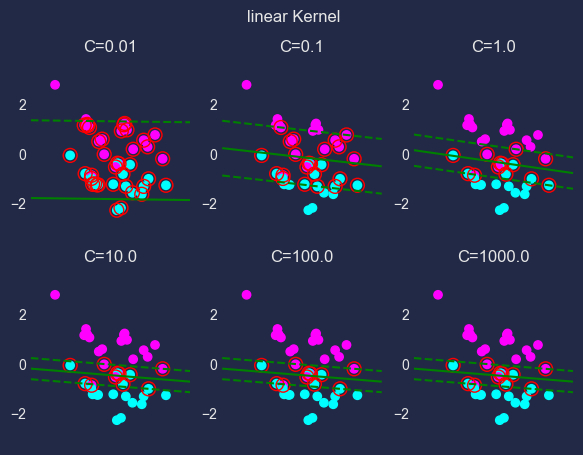

In [7]:
X,y = make_classification(n_samples=40,n_classes=2,n_features=2,
                          n_informative=2,n_redundant=0,
                          random_state=555)
understanding_role_of_c(X,y,C,kernel="linear")

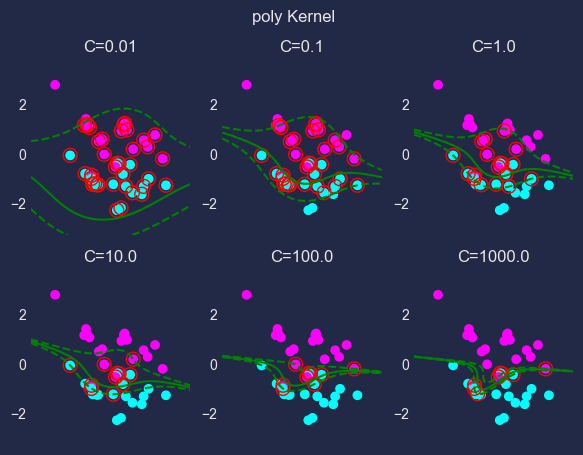

In [8]:
understanding_role_of_c(X,y,C,kernel="poly")

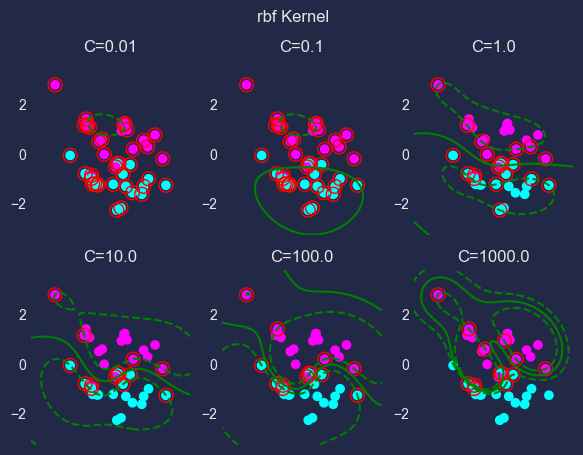

In [9]:
understanding_role_of_c(X,y,C,kernel="rbf")

$${\displaystyle {\begin{aligned}&{\underset {\mathbf {w} ,\;b,\;\mathbf {\zeta } }{\operatorname {minimize} }}&&\|\mathbf {w} \|_{2}^{2}+C\sum _{i=1}^{N}\zeta _{i}\\&{\text{subject to}}&&y_{i}(\mathbf {w} ^{\top }\mathbf {x} _{i}-b)\geq 1-\zeta _{i},\quad \zeta _{i}\geq 0\quad \forall i\in \{1,\dots ,n\}\end{aligned}}}$$

1. C control the with of margin and misclassification ,
2. When the C is small , SVM care about the margin width not care about the misclassification. so it will do lot misclassification and number of support vector also increase.
3. when the C is large , SVM care lot about the misclassification and not care about the margin width, so the margin width will be reduced and the number of support vector also decreased


# Non Linear

In [10]:
from sklearn.datasets import make_circles

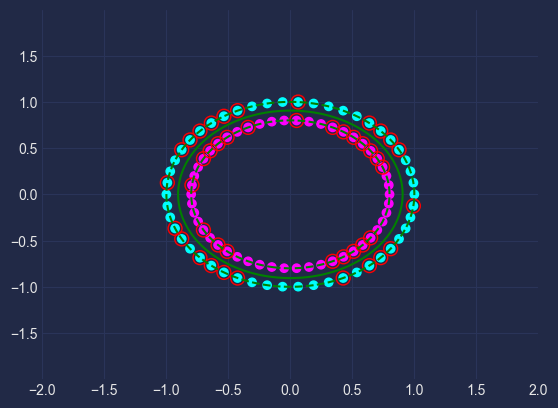

In [11]:
X,y = make_circles()
clf = svm.SVC(kernel="poly",C=1,degree=2)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y)
ax = plt.gca()

# draw the decision surface
DecisionBoundaryDisplay.from_estimator(estimator=clf,X=X,plot_method="contour",
                                       colors="g",
                                       linestyles=["--","-","--"],
                                       levels=[-1,0,1],ax=ax)
ax.scatter(clf.support_vectors_[:,0],
           clf.support_vectors_[:,1],
           s=100,
           edgecolors="r",
           facecolors="none"
           )
plt.show()

In [12]:
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

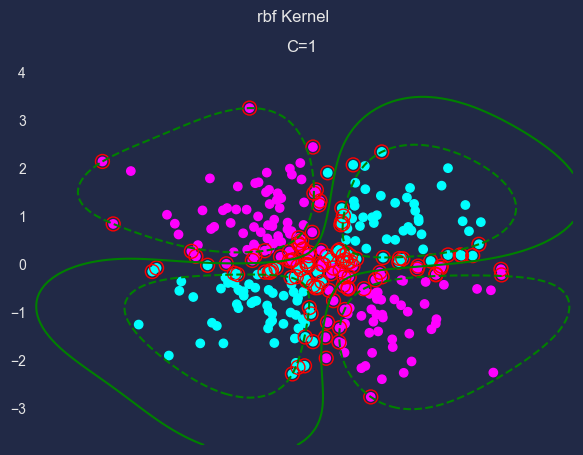

In [13]:
understanding_role_of_c(X,Y,[1],"rbf",col=1)